In [507]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [508]:
trainData = pd.read_csv("dataset/features.csv")
data_cols = np.array(trainData.columns)
data_cols

array(['letter_slant', 'line_slant', 'margin_slope', 'letter_size',
       'word_spacing', 'personality'], dtype=object)

In [509]:
trainData.head()

,letter_slant,line_slant,margin_slope,letter_size,word_spacing,personality
0,2.0,-75.1,4.1,931.7,15.0,Agreeableness
1,-11.0,9.6,15.3,486.2,22.0,Agreeableness
2,18.0,-2.3,1.0,112.8,1.0,Agreeableness
3,6.0,-4.0,-1.1,30.6,1.0,Agreeableness
4,-6.0,0.0,2.2,152.9,9.0,Agreeableness


In [510]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    float64
 1   line_slant    221 non-null    float64
 2   margin_slope  221 non-null    float64
 3   letter_size   221 non-null    float64
 4   word_spacing  221 non-null    float64
 5   personality   221 non-null    object 
dtypes: float64(5), object(1)
memory usage: 10.5+ KB


In [511]:
trainData.isnull().sum()

letter_slant    0
line_slant      0
margin_slope    0
letter_size     0
word_spacing    0
personality     0
dtype: int64

In [512]:
trainData = trainData.dropna(axis=0)
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    float64
 1   line_slant    221 non-null    float64
 2   margin_slope  221 non-null    float64
 3   letter_size   221 non-null    float64
 4   word_spacing  221 non-null    float64
 5   personality   221 non-null    object 
dtypes: float64(5), object(1)
memory usage: 10.5+ KB


In [513]:
y = trainData[data_cols[-1]]
x = trainData.drop(data_cols[-1], axis=1)

In [514]:
x

,letter_slant,line_slant,margin_slope,letter_size,word_spacing
0,2.0,-75.1,4.1,931.7,15.0
1,-11.0,9.6,15.3,486.2,22.0
2,18.0,-2.3,1.0,112.8,1.0
3,6.0,-4.0,-1.1,30.6,1.0
4,-6.0,0.0,2.2,152.9,9.0
...,...,...,...,...,...
216,11.0,-6.3,-6.2,190.4,9.0
217,5.0,-4.0,25.5,71.5,20.0
218,5.0,-1.1,-0.2,55.7,50.0
219,13.0,-5.9,-20.1,187.8,62.0


In [515]:
y

0      Agreeableness
1      Agreeableness
2      Agreeableness
3      Agreeableness
4      Agreeableness
           ...      
216         Openness
217         Openness
218         Openness
219         Openness
220         Openness
Name: personality, Length: 221, dtype: object

In [516]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [517]:
print(f"Train: {x_train.shape}")
print(f"Test: {x_test.shape}")

Train: (198, 5)
Test: (23, 5)


In [518]:
accuracies = []
for i in range(1, x_train.shape[0] + 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

In [519]:
accuracies

[0.30434782608695654,
 0.34782608695652173,
 0.34782608695652173,
 0.391304347826087,
 0.30434782608695654,
 0.43478260869565216,
 0.391304347826087,
 0.43478260869565216,
 0.4782608695652174,
 0.5217391304347826,
 0.5652173913043478,
 0.4782608695652174,
 0.5652173913043478,
 0.6086956521739131,
 0.5652173913043478,
 0.5652173913043478,
 0.6086956521739131,
 0.6086956521739131,
 0.5652173913043478,
 0.5652173913043478,
 0.5652173913043478,
 0.5652173913043478,
 0.6086956521739131,
 0.6521739130434783,
 0.6521739130434783,
 0.6086956521739131,
 0.5652173913043478,
 0.5217391304347826,
 0.5652173913043478,
 0.5652173913043478,
 0.5652173913043478,
 0.6086956521739131,
 0.5652173913043478,
 0.5652173913043478,
 0.5652173913043478,
 0.5217391304347826,
 0.5652173913043478,
 0.5652173913043478,
 0.5217391304347826,
 0.5217391304347826,
 0.4782608695652174,
 0.5652173913043478,
 0.5652173913043478,
 0.5652173913043478,
 0.5652173913043478,
 0.5652173913043478,
 0.5652173913043478,
 0.565217

In [520]:
max_accuracy = max(accuracies)
max_accuracy

0.6521739130434783

In [521]:
max_index = accuracies.index(max_accuracy)

In [522]:
# k = int(input("Enter number of neighbours: "))
knn = KNeighborsClassifier(n_neighbors=max_index+1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [523]:
y_pred = knn.predict(x_test)
y_pred

array(['Openness', 'Openness', 'Openness', 'Openness', 'Openness',
       'Neuroticism', 'Openness', 'Openness', 'Openness', 'Neuroticism',
       'Openness', 'Neuroticism', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness', 'Openness',
       'Conscientiousness', 'Openness', 'Openness', 'Openness'],
      dtype=object)

In [524]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6521739130434783

In [525]:
import joblib
import os
joblib.dump(knn, "./saved_models/knn1.joblib", compress=3)
print(f"Saved model size: {np.round(os.path.getsize('./saved_models/knn1.joblib') / 1024 / 1024, 3) } MB")

Saved model size: 0.005 MB


In [526]:
loaded_knn = joblib.load("./saved_models/knn1.joblib")
loaded_predict = loaded_knn.predict(x_test)
accuracy_score(y_test, loaded_predict)

0.6521739130434783

In [527]:
trainDataSave = pd.concat([x_train, y_train], axis=1)
trainDataSave.to_csv('./saved_models/train.csv', index=False)

testDataSave = pd.concat([x_test, y_test], axis=1)
testDataSave.to_csv('./saved_models/test.csv', index=False)

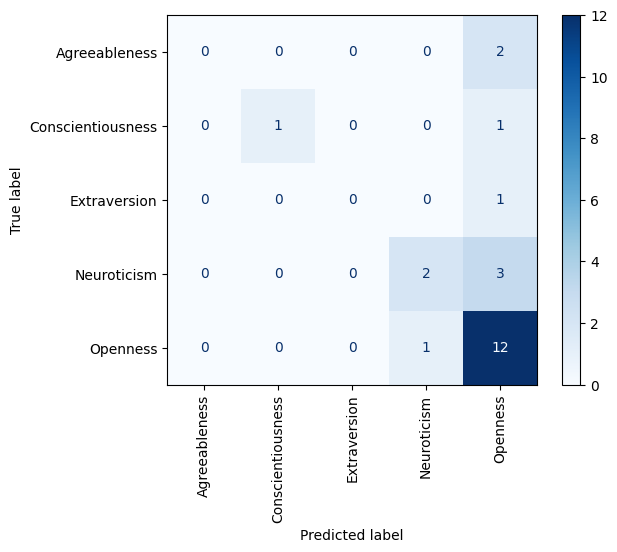

In [528]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(xticks_rotation="vertical", cmap="Blues")